In [1]:
import yt
import numpy as np
from scipy import *

In [2]:
import yt.units as u

In [3]:
my_header =  ['raw_density', 'x-velocity','y-velocity','z-velocity', 'pressure_nt',
                  'raw_pressure','metallicity','ref','H','E','H+','HE','HE+','HE++','H-','H2','H2+']

In [4]:
def density_alias(field, data):
    return data.ds.arr(data['raw_density'], 'code_mass/code_length**3')
def pressure_alias(field, data):
    return data.ds.arr(data['raw_pressure'], 'code_mass/code_time**2/code_length'

In [5]:
ds = yt.load("output_00028/info_00028.txt",fields=my_header)

yt : [INFO     ] 2018-07-21 10:41:39,328 Parameters: current_time              = 3.17276944493
yt : [INFO     ] 2018-07-21 10:41:39,329 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2018-07-21 10:41:39,330 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2018-07-21 10:41:39,332 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2018-07-21 10:41:39,333 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2018-07-21 10:41:39,334 Parameters: current_redshift          = 5.99989573952965
yt : [INFO     ] 2018-07-21 10:41:39,335 Parameters: omega_lambda              = 0.691999971866608
yt : [INFO     ] 2018-07-21 10:41:39,336 Parameters: omega_matter              = 0.30799999833107
yt : [INFO     ] 2018-07-21 10:41:39,338 Parameters: hubble_constant           = 0.677900009155273


In [6]:
ds.add_field('density', function=density_alias, units='g/cm**3',
             sampling_type='cell',force_override=True)
ds.add_field('pressure', function=pressure_alias, units='g/cm/s**2',
             sampling_type='cell',force_override=True)

In [21]:
ds.field_list

[('all', 'particle_age'),
 ('all', 'particle_identifier'),
 ('all', 'particle_mass'),
 ('all', 'particle_metallicity'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_refinement_level'),
 ('all', 'particle_velocity_x'),
 ('all', 'particle_velocity_y'),
 ('all', 'particle_velocity_z'),
 ('io', 'particle_age'),
 ('io', 'particle_identifier'),
 ('io', 'particle_mass'),
 ('io', 'particle_metallicity'),
 ('io', 'particle_position_x'),
 ('io', 'particle_position_y'),
 ('io', 'particle_position_z'),
 ('io', 'particle_refinement_level'),
 ('io', 'particle_velocity_x'),
 ('io', 'particle_velocity_y'),
 ('io', 'particle_velocity_z'),
 ('ramses', 'E'),
 ('ramses', 'H'),
 ('ramses', 'H+'),
 ('ramses', 'H-'),
 ('ramses', 'H2'),
 ('ramses', 'H2+'),
 ('ramses', 'HE'),
 ('ramses', 'HE+'),
 ('ramses', 'HE++'),
 ('ramses', 'metallicity'),
 ('ramses', 'pressure_nt'),
 ('ramses', 'raw_density'),
 ('ramses', 'raw_pressure'),
 ('ramses',

In [9]:
center_init = [ 0.53095117,  0.51029149,  0.50401411]
los_vec = [ 0.9,    0.3082207, 0.3082207]
mms = 512
size = 0.00166389148881
size_kpc = 7.0
up_vec = [ 0.3082207,  0.9, 0.3082207]

yt : [INFO     ] 2018-07-21 10:44:42,152 Projection completed
yt : [INFO     ] 2018-07-21 10:44:42,173 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:44:42,174 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 10:44:42,177 xlim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:44:42,179 ylim = 0.030951 1.030951
yt : [INFO     ] 2018-07-21 10:44:42,194 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 10:44:43,287 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



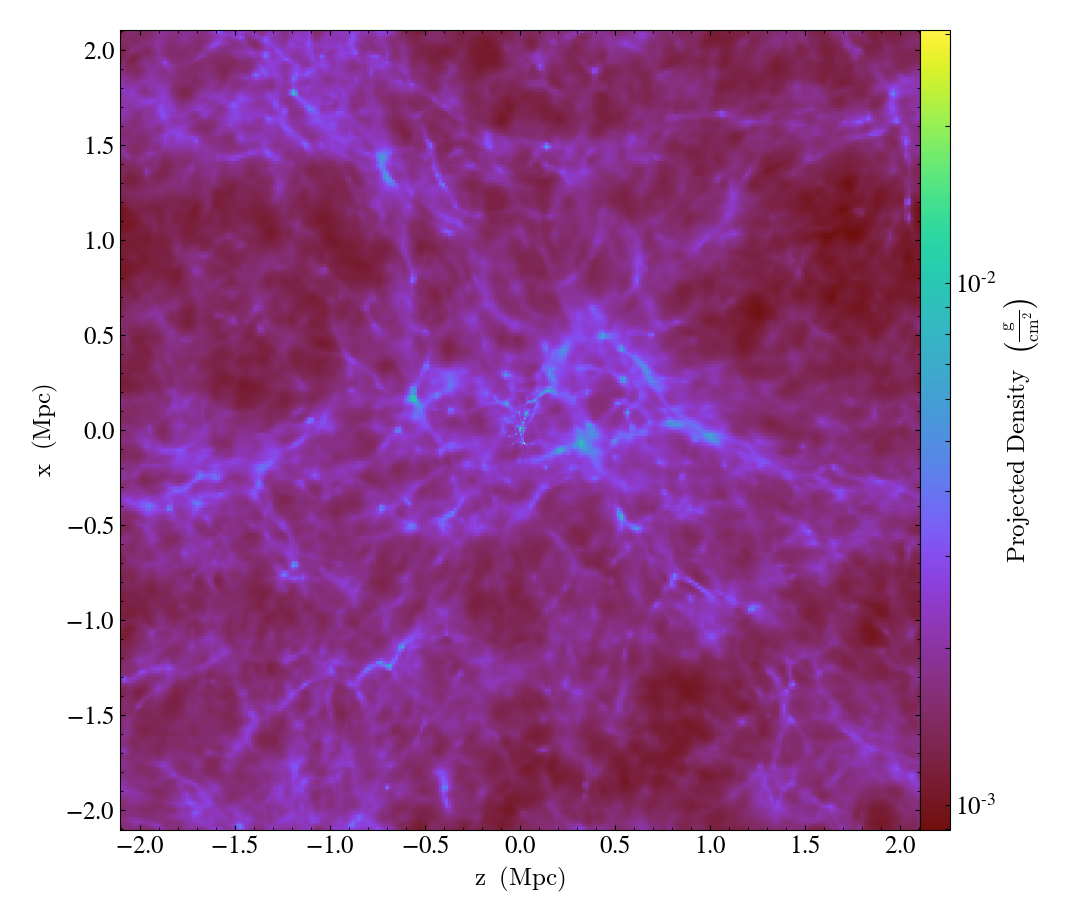

In [10]:
p = yt.ProjectionPlot(ds,'y','density',center_init)
#p.annotate_grids()
p.zoom(1)

In [11]:
# random sampling of ray direction
num_rays = 10
rtheta = np.arccos(1-2*np.random.rand(num_rays))
rphi = np.random.rand(num_rays)*2*pi

In [48]:
rays = []
col_dens = []
# radius of the ray path
radius = np.array(10*u.kpc/ds.domain_width.in_units('kpc')[0]/(1+ds.current_redshift))

In [49]:
# loop to sample light rays
for i in range(num_rays):
    theta = rtheta[i]
    phi = rphi[i]
    endpos = center_init + radius*[sin(theta)*cos(phi), sin(theta)*sin(phi), cos(phi)]
    ray = ds.ray(center_init, endpos)
    col_dens.append(np.sum(ray['density']*ray['dx'])/u.mass_hydrogen)
    #print(col_dens.in_cgs())
col_dens = yt.YTArray(col_dens)

In [50]:
u.mass_hydrogen

1.6737352238051868e-24 g

In [51]:
col_dens.in_cgs()

YTArray([  2.58655819e+23,   4.97319746e+23,   6.99050430e+23,
         2.21750462e+24,   2.46951085e+23,   7.77236438e+23,
         8.23346463e+23,   5.58998164e+23,   2.46821551e+23,
         3.15290948e+23]) cm**(-2)

yt : [INFO     ] 2018-07-21 10:50:41,111 Projection completed
yt : [INFO     ] 2018-07-21 10:50:41,112 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 10:50:41,112 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:50:41,114 xlim = 0.010291 1.010291
yt : [INFO     ] 2018-07-21 10:50:41,115 ylim = 0.004014 1.004014
yt : [INFO     ] 2018-07-21 10:50:41,118 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2018-07-21 10:50:41,334 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



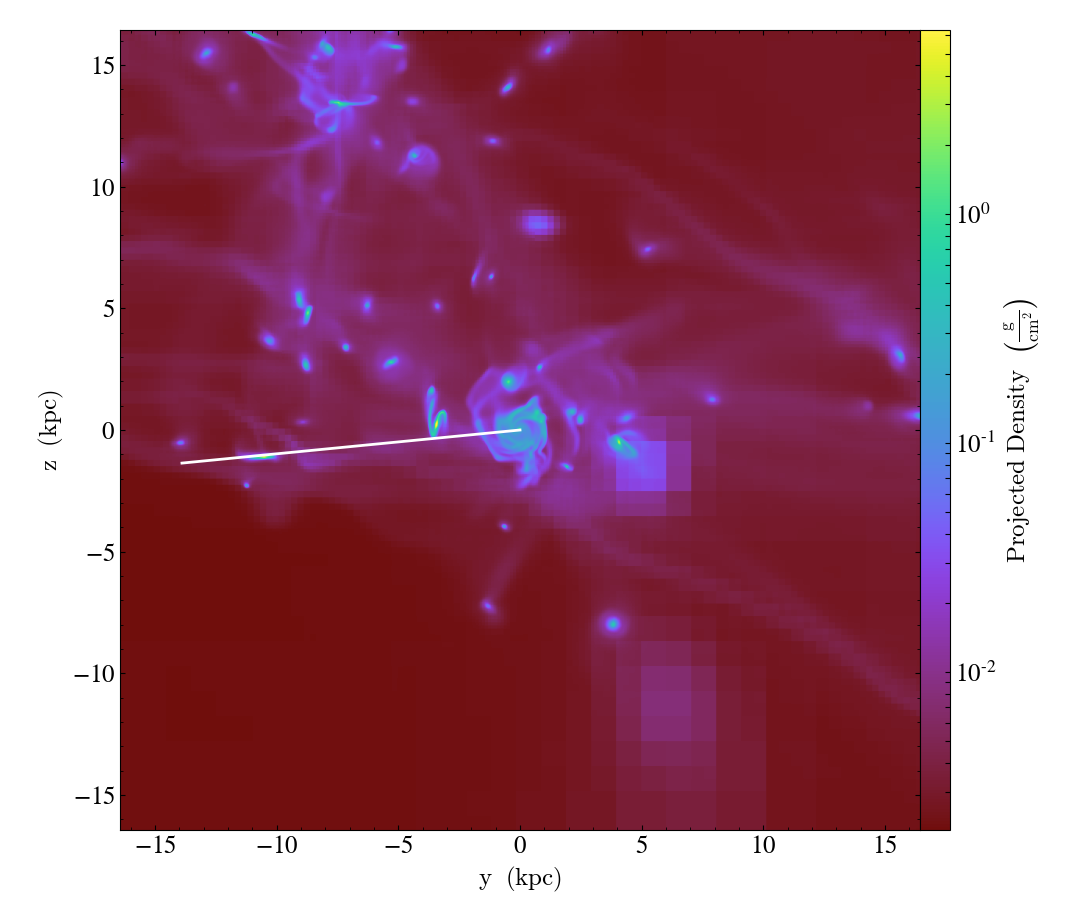

In [33]:
p = yt.ProjectionPlot(ds,'x','density',center_init)
#p = yt.SlicePlot(ds, 'y', 'density',center_init)
p.annotate_ray(ray)
p.zoom(128)